In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

In [2]:
# ================
# Загрузка и обработка данных
# ================

# Загрузка датасета
df = pd.read_csv('dataset/carvana.csv')

# Оставим только нужные признаки
df = df[['name', 'year', 'miles', 'price']].dropna()

# Преобразуем поле "year" — берём только первые 4 цифры
df['year'] = df['year'].astype(str).str.extract(r'(\d{4})')
df = df.dropna(subset=['year'])  # вдруг не получилось извлечь
df['year'] = df['year'].astype(int)

# Выделим марку (make) из поля "name" — возьмем первое слово
df['make'] = df['name'].apply(lambda x: x.split()[0] if isinstance(x, str) else 'Unknown')

# Удалим исходный name
df = df.drop(columns=['name'])

# Кодирование категориального признака "make"
df = pd.get_dummies(df, columns=['make'], drop_first=True)

# Удалим дубликаты
df = df.drop_duplicates()

# Разделим X и y
X = df.drop(columns=['price'])
y = df['price']

# Масштабируем числовые признаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Деление: 90% на train, 10% на test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, train_size=0.9, random_state=42
)

In [3]:
# ================
# Обучение моделей
# ================

models = {
    "Bagging": BaggingRegressor(estimator=LinearRegression(), n_estimators=10, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    results[name] = {'MAE': mae, 'R2': r2}
    print(f"{name}:\n  MAE = {mae:.2f}\n  R2  = {r2:.4f}\n")

Bagging:
  MAE = 3426.64
  R2  = 0.5314

Random Forest:
  MAE = 3517.29
  R2  = 0.4591

AdaBoost:
  MAE = 5809.69
  R2  = -0.0104

Gradient Boosting:
  MAE = 3306.88
  R2  = 0.5537



C:\Users\LOQ\AppData\Local\Temp\ipykernel_9308\2681796526.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=mae_values, palette='Blues_d')


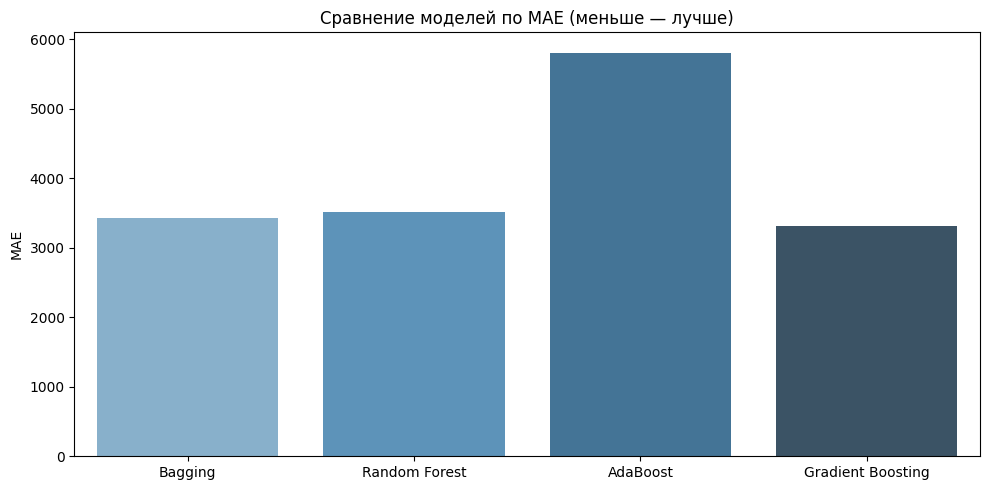

C:\Users\LOQ\AppData\Local\Temp\ipykernel_9308\2681796526.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=r2_values, palette='Greens_d')


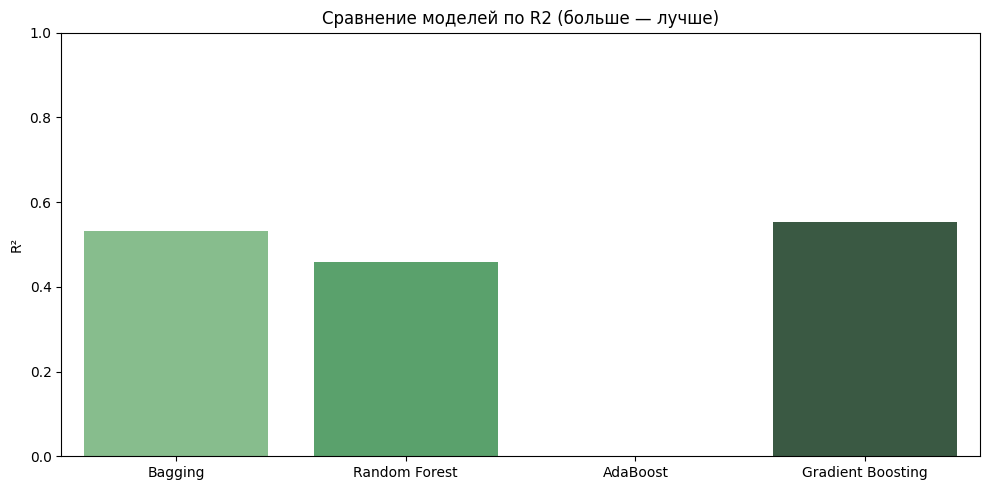

In [4]:
# ================
# Визуализация результатов
# ================

# График: сравнение MAE
mae_values = [v['MAE'] for v in results.values()]
r2_values = [v['R2'] for v in results.values()]
model_names = list(results.keys())

plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=mae_values, palette='Blues_d')
plt.title('Сравнение моделей по MAE (меньше — лучше)')
plt.ylabel('MAE')
plt.tight_layout()
plt.show()

# График: сравнение R2
plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=r2_values, palette='Greens_d')
plt.title('Сравнение моделей по R2 (больше — лучше)')
plt.ylabel('R²')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

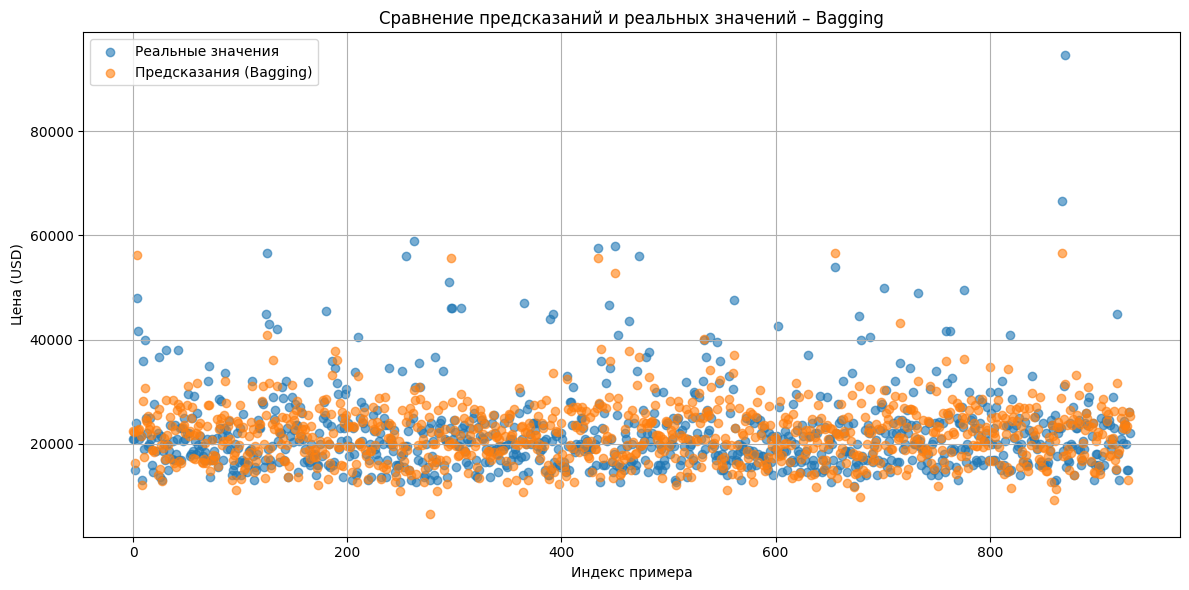

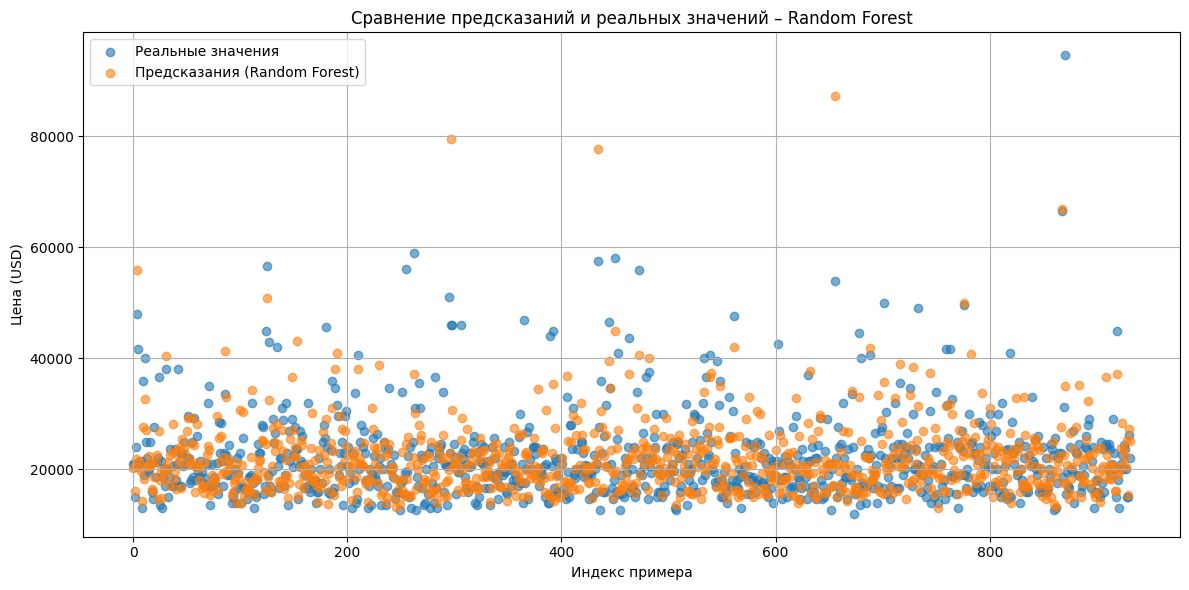

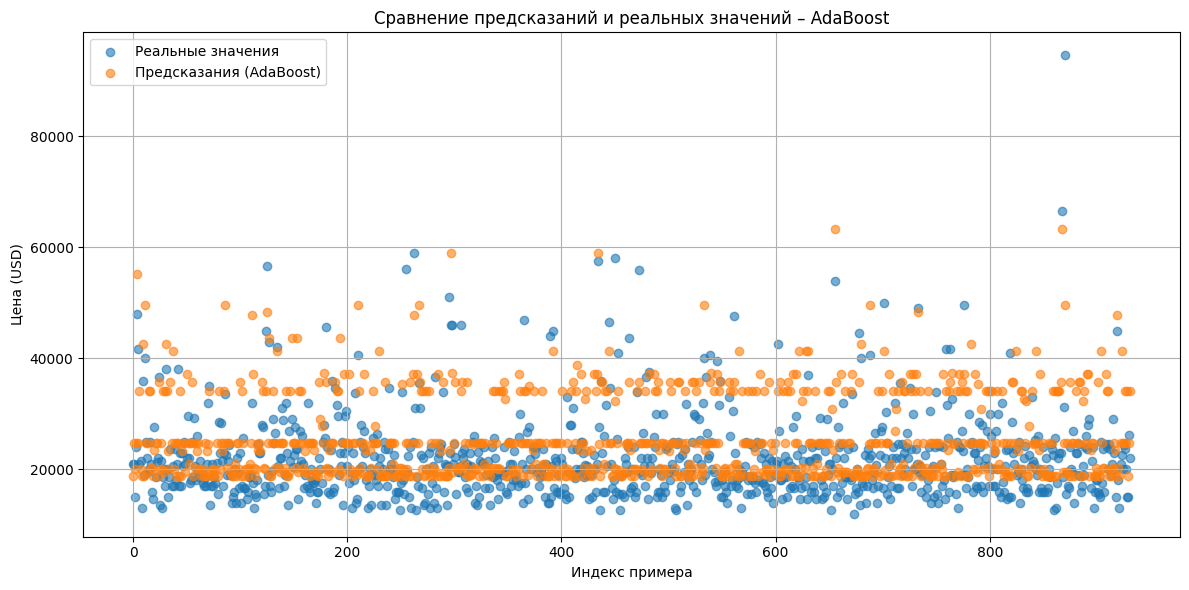

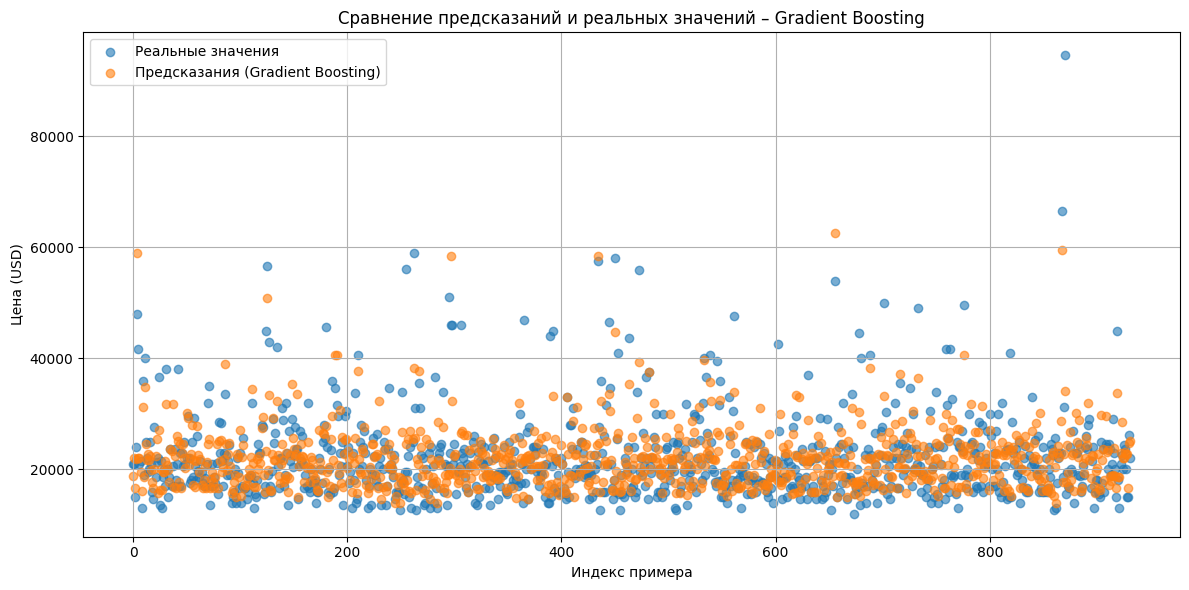

In [5]:
# Дополнительно: графики предсказаний моделей
for name, model in models.items():
    y_pred = model.predict(X_test)
    
    plt.figure(figsize=(12, 6))
    plt.scatter(range(len(y_test)), y_test, label='Реальные значения', alpha=0.6)
    plt.scatter(range(len(y_pred)), y_pred, label=f'Предсказания ({name})', alpha=0.6)
    plt.title(f'Сравнение предсказаний и реальных значений – {name}')
    plt.xlabel('Индекс примера')
    plt.ylabel('Цена (USD)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()